#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

# Ler os dados JSON da URL bruta
# Esta linha cria a variável 'dataframe'
dataframe = pd.read_json(url)

# Print do dataframe com informações utéis usando pandas
dataframe.info(verbose=False)
dataframe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Columns: 6 entries, customerID to account
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [2]:
# Recarregando os dados novamente para evitar erros.
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

# Converter a coluna 'Churn' para bool, lidando com NaNs
dataframe['Churn'] = dataframe['Churn'].map({'Yes': True, 'No': False})
# Preencher NaNs com False (ou outro valor booleano adequado) e converter para bool
dataframe['Churn'] = dataframe['Churn'].fillna(False).astype(bool)

# Desaninhando colunas de dicionarios para colunas unicas
# Renomear as colunas para evitar conflitos futuros

# 1. Desaninhar a coluna 'customer'
customer_details = dataframe['customer'].apply(pd.Series)
customer_details = customer_details.add_prefix('customer_')

# 2. Desaninhar a coluna 'phone'
phone_details = dataframe['phone'].apply(pd.Series)
phone_details = phone_details.add_prefix('phone_')

# 3. Desaninhar a coluna 'internet'
internet_details = dataframe['internet'].apply(pd.Series)
internet_details = internet_details.add_prefix('internet_')

# 4. Desaninhar a coluna 'account'
account_details = dataframe['account'].apply(pd.Series)
account_details = account_details.add_prefix('account_')

# --- Combinar as novas colunas com o DataFrame original ---

# Juntar os DataFrames desaninhados com o DataFrame original.
# Removemos as colunas originais que continham os dicionários.
dataframe = pd.concat([dataframe.drop(columns=['customer', 'phone', 'internet', 'account']),
                       customer_details,
                       phone_details,
                       internet_details,
                       account_details], axis=1)


<ipython-input-2-bf79afad536e>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['Churn'] = dataframe['Churn'].fillna(False).astype(bool)


In [3]:
dataframe.columns = dataframe.columns.str.lower().str.replace(' ', '_')
dataframe.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [4]:
# Desaninhar a coluna 'account_charges'
# Ela não desanhinhou antes devido ter um nível adicional
account_charges_details = dataframe['account_charges'].apply(pd.Series)
account_charges_details = account_charges_details.add_prefix('account_charges_')

# Combinar as novas colunas com o DataFrame original
# Removemos a coluna original 'account_charges'
dataframe = pd.concat([dataframe.drop(columns=['account_charges']),
                       account_charges_details], axis=1)

In [5]:
print(dataframe['account_charges_Monthly'].dtype)

float64


In [6]:
# Definir o número médio de dias em um mês
dias_no_mes = 30.44

# Definir a variável com o nome correto da coluna de faturamento mensal
faturamento_mensal = 'account_charges_Monthly'

# Verificar se a coluna de faturamento mensal existe
if faturamento_mensal in dataframe.columns:
    # Certificar-se de que a coluna de faturamento mensal é numérica
    # Se houver erros na conversão (por exemplo, valores não numéricos), eles serão convertidos para NaN
    dataframe[faturamento_mensal] = pd.to_numeric(dataframe[faturamento_mensal], errors='coerce')

    # Calcular as contas diárias
    # Lidando com possíveis divisões por zero ou NaNs
    # Usando numpy.where para lidar com faturamento mensal igual a 0 ou NaN
    dataframe['Contas_Diarias'] = np.where(
        dataframe[faturamento_mensal].fillna(0) == 0, # Condição: se faturamento mensal for 0 ou NaN
        0, # Valor se a condição for verdadeira (Contas Diárias = 0)
        dataframe[faturamento_mensal] / dias_no_mes # Valor se a condição for falsa (cálculo normal)
    )

    print(f"\nColuna 'Contas_Diarias' criada com sucesso usando '{faturamento_mensal}'!")
    print("Verificando as primeiras linhas com a nova coluna:")
    print(dataframe[[faturamento_mensal, 'Contas_Diarias']].head())
    print("\nVerificando o tipo de dado da nova coluna:")
    print(dataframe['Contas_Diarias'].dtype)
    print("\nEstatísticas descritivas para a nova coluna:")
    print(dataframe['Contas_Diarias'].describe())

else:
    print(f"\nERRO: A coluna '{faturamento_mensal}' não foi encontrada no DataFrame.")
    print("Por favor, verifique o nome correto da coluna que contém o faturamento mensal.")
    print("Colunas presentes:", dataframe.columns.tolist()) # Liste todas as colunas para ajudar na identificação


Coluna 'Contas_Diarias' criada com sucesso usando 'account_charges_Monthly'!
Verificando as primeiras linhas com a nova coluna:
   account_charges_Monthly  Contas_Diarias
0                     65.6        2.155059
1                     59.9        1.967806
2                     73.9        2.427727
3                     98.0        3.219448
4                     83.9        2.756242

Verificando o tipo de dado da nova coluna:
float64

Estatísticas descritivas para a nova coluna:
count    7267.000000
mean        2.126153
std         0.989802
min         0.599540
25%         1.163765
50%         2.309461
75%         2.952530
max         3.901117
Name: Contas_Diarias, dtype: float64


In [7]:
dataframe.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_Monthly,account_charges_Total,Contas_Diarias
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.155059
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.967806
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.756242


# 🏳 Tradução de colunas

In [16]:
# Dicionário
novos_nomes_colunas = {
    'customer_customerid': 'id_cliente',
    'customer_gender': 'genero',
    'customer_seniorcitizen': 'cliente_idoso',
    'customer_partner': 'parceiro',
    'customer_dependents': 'dependentes',
    'customer_tenure': 'meses_contrato',
    'phone_phoneservice': 'servico_telefone',
    'phone_multiplelines': 'multiplas_linhas',
    'internet_internetservice': 'servico_internet',
    'internet_onlinesecurity': 'seguranca_online',
    'internet_onlinebackup': 'backup_online',
    'internet_deviceprotection': 'protecao_dispositivo',
    'internet_techsupport': 'suporte_tecnico',
    'internet_streamingtv': 'streaming_tv',
    'internet_streamingmovies': 'streaming_filmes',
    'account_contract': 'contrato',
    'account_paperlessbilling': 'fatura_sem_papel',
    'account_paymentmethod': 'metodo_pagamento',
    'account_charges_Monthly': 'faturamento_mensal',
    'account_charges_Total': 'faturamento_total',
    'Contas_Diarias': 'contas_diarias',
    'churn': 'cancelamento'
}
# Renomear as colunas usando o dicionário
dataframe = dataframe.rename(columns=novos_nomes_colunas, errors='ignore') # Use errors='ignore' se não tiver certeza que todos os nomes existem


In [17]:
dataframe.head()

,customerid,cancelamento,genero,cliente_idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_sem_papel,metodo_pagamento,faturamento_mensal,faturamento_total,contas_diarias
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.155059
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.967806
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.756242


#📊 Carga e análise

In [18]:
# Descrição das colunas númericas
print("\nEstatísticas Descritivas para colunas numéricas:")
# Aplica o arredondamento na saída do describe()
print(dataframe.describe().round(2)) # Arredonda para 2 casas decimais


Estatísticas Descritivas para colunas numéricas:
       cliente_idoso  meses_contrato  faturamento_mensal  contas_diarias
count        7267.00         7267.00             7267.00         7267.00
mean            0.16           32.35               64.72            2.13
std             0.37           24.57               30.13            0.99
min             0.00            0.00               18.25            0.60
25%             0.00            9.00               35.42            1.16
50%             0.00           29.00               70.30            2.31
75%             0.00           55.00               89.88            2.95
max             1.00           72.00              118.75            3.90


In [20]:
# Descrição das colunas str
print("\nEstatísticas Descritivas para colunas categóricas:")
print(dataframe.describe(include='object'))


Estatísticas Descritivas para colunas categóricas:
        customerid genero parceiro dependentes servico_telefone  \
count         7267   7267     7267        7267             7267   
unique        7267      2        2           2                2   
top     9995-HOTOH   Male       No          No              Yes   
freq             1   3675     3749        5086             6560   

       multiplas_linhas servico_internet seguranca_online backup_online  \
count              7267             7267             7267          7267   
unique                3                3                3             3   
top                  No      Fiber optic               No            No   
freq               3495             3198             3608          3182   

       protecao_dispositivo suporte_tecnico streaming_tv streaming_filmes  \
count                  7267            7267         7267             7267   
unique                    3               3            3                3   
top  

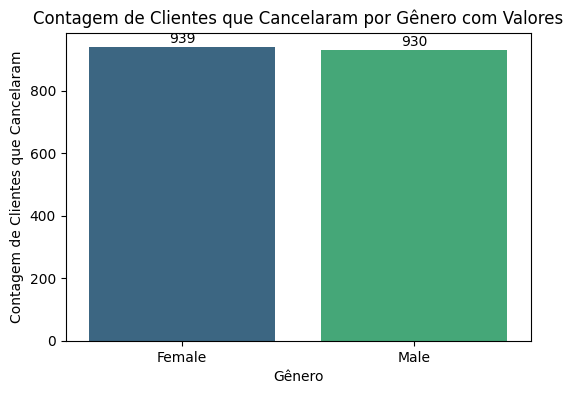

In [13]:
# Gráfico mostrando a contagem APENAS dos que Cancelaram por genero
contagem_genero_cancelamento = dataframe[dataframe['cancelamento'] == True].groupby('genero').size().reset_index(name='Contagem')
plt.figure(figsize=(6, 4))
# Usando a contagem calculada (coluna 'Contagem') para o eixo Y
ax = sns.barplot(x='genero', y='Contagem', data=contagem_genero_cancelamento, hue='genero', palette='viridis', legend=False)
plt.title('Contagem de Clientes que Cancelaram por Gênero com Valores')
plt.xlabel('Gênero')
plt.ylabel('Contagem de Clientes que Cancelaram')

# Adicionando os rótulos de valor (contagem de cancelamentos)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, # Ajuste o deslocamento vertical (+5 aqui)
            f'{int(height)}', # Formata o texto como um número inteiro
            ha='center',
            va='bottom')

plt.show()

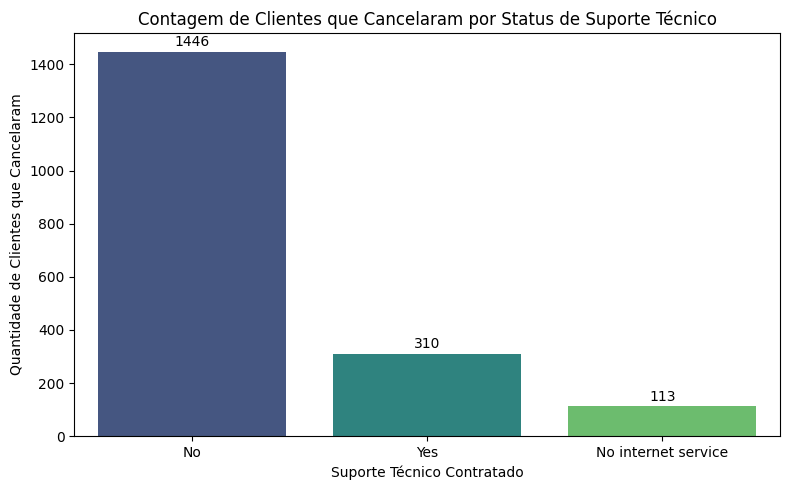

In [21]:
# 1. Filtrar o DataFrame para incluir apenas os clientes que cancelaram
clientes_cancelaram = dataframe[dataframe['cancelamento'] == True]

# 2. Contar a frequência dos valores na coluna 'suporte_tecnico' para esses clientes
# Usei value_counts() para obter a contagem e reset_index() para converter para DataFrame
contagem_suporte_cancelamento = clientes_cancelaram['suporte_tecnico'].value_counts().reset_index()
contagem_suporte_cancelamento.columns = ['suporte_tecnico', 'Contagem'] # Renomear colunas para clareza

# 3. Criar o gráfico de barras
plt.figure(figsize=(8, 5)) # Define o tamanho da figura

# Usando seaborn.barplot com os dados calculados
ax = sns.barplot(x='suporte_tecnico', y='Contagem', data=contagem_suporte_cancelamento, palette='viridis', hue='suporte_tecnico', legend=False)

plt.title('Contagem de Clientes que Cancelaram por Status de Suporte Técnico')
plt.xlabel('Suporte Técnico Contratado')
plt.ylabel('Quantidade de Clientes que Cancelaram')
plt.xticks(rotation=0) # Mantém os rótulos do eixo X na horizontal para facilitar a leitura

# Adicionando os rótulos de valor (contagem) nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, # Ajusta a posição vertical do texto
            f'{int(height)}', # Formata o texto como um número inteiro
            ha='center', # Alinha horizontalmente ao centro da barra
            va='bottom') # Alinha verticalmente abaixo do ponto de referência (topo da barra)

plt.tight_layout() # Ajusta o layout para evitar sobreposição de elementos
plt.show()

In [ ]:
# 1. Filtrar o DataFrame para incluir apenas os clientes que cancelaram
clientes_cancelaram = dataframe[dataframe['cancelamento'] == True].copy() # Usar .copy() para evitar SettingWithCopyWarning

# 2. Criar categorias para o tempo de contrato (meses_contrato) APENAS para os clientes que cancelaram
# Definindo os limites das categorias de tempo de contrato em meses
bins = [0, 1, 12, 24, clientes_cancelaram['meses_contrato'].max()]
# Definindo os rótulos para as categorias
labels = ['Primeiro Mês', 'Primeiro Ano (2-12 meses)', 'Segundo Ano (13-24 meses)', 'Mais de 2 anos']

# Criar uma nova coluna categórica 'tempo_contrato_categoria' usando pd.cut
# Incluindo right=True nos limites do bin (intervalos fechados à direita)
clientes_cancelaram['tempo_contrato_categoria'] = pd.cut(
    clientes_cancelaram['meses_contrato'],
    bins=bins,
    labels=labels,
    right=True, # Define se o limite superior do bin é inclusivo
    include_lowest=True # Inclui o valor mais baixo no primeiro bin (útil para o bin 0-1)
)

# Nota pra lembrar como funciona o pd.cut:
# bins=[0, 1, 12, 24, max_tenure] e right=True significa os intervalos:
# (0, 1] -> Primeiro Mês (inclui tenure=1)
# (1, 12] -> Primeiro Ano (2-12 meses) (inclui tenure=12)
# (12, 24] -> Segundo Ano (13-24 meses) (inclui tenure=24)
# (24, max_tenure] -> Mais de 2 anos

# Verificar a distribuição das novas categorias
print("Distribuição de Cancelamentos por Categoria de Tempo de Contrato:")
print(clientes_cancelaram['tempo_contrato_categoria'].value_counts().sort_index()) # Ordenar pelo índice para ver a ordem dos bins

# 3. Criar o gráfico de barras
plt.figure(figsize=(10, 6)) # Define o tamanho da figura

# Usando seaborn.countplot para visualizar a contagem de cancelamentos por categoria de tempo de contrato
# Ordenar as barras de acordo com a ordem definida nos labels
ordem_categorias = labels
ax = sns.countplot(x='tempo_contrato_categoria', data=clientes_cancelaram, palette='viridis', order=ordem_categorias, hue='tempo_contrato_categoria', legend=False)

plt.title('Contagem de Clientes que Cancelaram por Tempo de Contrato')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Quantidade de Clientes que Cancelaram')
plt.xticks(rotation=0) # Mantém os rótulos do eixo X horizontais

# Adicionando os rótulos de valor (contagem) nas barras
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height): # Verifica se a altura não é NaN antes de adicionar o texto
        ax.text(p.get_x() + p.get_width()/2., height + 10, # Ajusta a posição vertical
                f'{int(height)}', # Formata o texto
                ha='center',
                va='bottom')
# Calcular o número total de clientes que cancelaram
total_clientes_cancelaram = dataframe['cancelamento'].sum()

print(f"O número total de clientes que cancelaram é: {total_clientes_cancelaram}")
plt.tight_layout() # Ajusta o layout
plt.show()


In [ ]:
# 1. Filtrar o DataFrame para incluir apenas os clientes que cancelaram
clientes_cancelaram = dataframe[dataframe['cancelamento'] == True].copy()

# 2. Criar categorias para o tempo de contrato (meses_contrato) APENAS para os clientes que cancelaram
bins = [0, 1, 12, 24, clientes_cancelaram['meses_contrato'].max()]
labels = ['Primeiro Mês', 'Primeiro Ano (2-12 meses)', 'Segundo Ano (13-24 meses)', 'Mais de 2 anos']

clientes_cancelaram['tempo_contrato_categoria'] = pd.cut(
    clientes_cancelaram['meses_contrato'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# 3. Criar o gráfico de barras AGRUPADO
plt.figure(figsize=(12, 7)) # Ajuste o tamanho da figura conforme necessário

# Usando seaborn.countplot
# x='tempo_contrato_categoria': A categoria de tempo de contrato no eixo X
# hue='suporte_tecnico': Agrupa as barras dentro de cada categoria de tempo de contrato pelo status de suporte técnico
# data=clientes_cancelaram: O dataframe contendo APENAS os clientes que cancelaram
# palette='viridis': Esquema de cores
# order=labels: Garante que as categorias de tempo de contrato apareçam na ordem correta
ax = sns.countplot(x='tempo_contrato_categoria', hue='suporte_tecnico', data=clientes_cancelaram,
                   palette='viridis', order=labels)

plt.title('Clientes que Cancelaram: Distribuição por Tempo de Contrato e Suporte Técnico')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Quantidade de Clientes que Cancelaram')
plt.xticks(rotation=0)

# Adiciona a legenda para o 'hue' (Suporte Técnico)
ax.legend(title='Suporte Técnico', loc='upper right')

# Adicionando os rótulos de valor nas barras (isso é um pouco mais complexo para barras agrupadas)
# Este loop itera sobre as barras e adiciona texto. Pode precisar de ajuste fino de posição.
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3) # label_type='edge' coloca o texto acima da barra

plt.tight_layout() # Ajusta o layout
plt.show()

In [ ]:
# 1. Identificar as colunas que representam serviços
colunas_servicos = [
    'servico_telefone',
    'multiplas_linhas',
    'servico_internet',
    'seguranca_online',
    'backup_online',
    'protecao_dispositivo',
    'suporte_tecnico',
    'streaming_tv',
    'streaming_filmes'
]

# 2. Criar uma nova coluna contando o número de serviços ATIVOS
# Inicializa a contagem de serviços para cada cliente como 0
dataframe['quantidade_servicos'] = 0

# Itera sobre as colunas de serviço e incrementa a contagem se o serviço estiver ativo
for coluna in colunas_servicos:
    # Verifica os valores únicos para entender o que é um serviço ativo nesta coluna
    # print(f"Valores únicos em {coluna}: {dataframe[coluna].unique()}") # Descomente para inspecionar

    if coluna == 'servico_telefone':
        # 'Yes' significa que o serviço de telefone está ativo
        dataframe['quantidade_servicos'] += (dataframe[coluna] == 'Yes').astype(int)
    elif coluna == 'multiplas_linhas':
        # 'Yes' significa múltiplas linhas ativas (depende de ter servico_telefone, mas contamos como um serviço adicional)
        dataframe['quantidade_servicos'] += (dataframe[coluna] == 'Yes').astype(int)
    elif coluna == 'servico_internet':
        # 'DSL' ou 'Fiber optic' significam que o serviço de internet está ativo
        dataframe['quantidade_servicos'] += ((dataframe[coluna] == 'DSL') | (dataframe[coluna] == 'Fiber optic')).astype(int)
    # Para os serviços relacionados à internet, 'Yes' indica que o serviço adicional está ativo
    elif coluna in ['seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']:
         dataframe['quantidade_servicos'] += (dataframe[coluna] == 'Yes').astype(int)
    # Adicione outros casos aqui se houver outras colunas de serviço com lógicas diferentes

# Verificar a distribuição da nova coluna
print("Distribuição da quantidade de serviços por cliente:")
print(dataframe['quantidade_servicos'].value_counts().sort_index())

# 3. Calcular a taxa de cancelamento para cada quantidade de serviços
# Agrupa pelo número de serviços contratados e calcula a média da coluna 'cancelamento' (True=1, False=0)
taxa_cancelamento_por_servicos = dataframe.groupby('quantidade_servicos')['cancelamento'].mean().reset_index()
taxa_cancelamento_por_servicos.columns = ['quantidade_servicos', 'taxa_cancelamento']

print("\nTaxa de cancelamento por quantidade de serviços:")
print(taxa_cancelamento_por_servicos)

# 4. Visualizar a relação usando um gráfico de barras
plt.figure(figsize=(10, 6))

# Usando seaborn.barplot para mostrar a taxa de cancelamento por quantidade de serviços
ax = sns.barplot(x='quantidade_servicos', y='taxa_cancelamento', data=taxa_cancelamento_por_servicos, palette='viridis')

plt.title('Taxa de Cancelamento por Quantidade de Serviços Contratados')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=0)

# Adicionando os rótulos de valor (taxa) nas barras
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(p.get_x() + p.get_width()/2., height + 0.01, # Ajusta a posição vertical
                f'{height:.2f}', # Formata o texto com 2 casas decimais
                ha='center',
                va='bottom')

plt.tight_layout()
plt.show()

Número de clientes com entre 2 e 6 serviços: 4640

Distribuição de Suporte Técnico neste subset:
suporte_tecnico
No                     3148
Yes                    1136
No internet service     356
Name: count, dtype: int64

Taxa de cancelamento por status de Suporte Técnico para clientes com 2-6 serviços:
       suporte_tecnico  taxa_cancelamento
0                   No           0.416137
1  No internet service           0.028090
2                  Yes           0.175176


<ipython-input-34-81deeeecb1dd>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='suporte_tecnico', y='taxa_cancelamento', data=taxa_cancelamento_subset_suporte, palette='viridis')


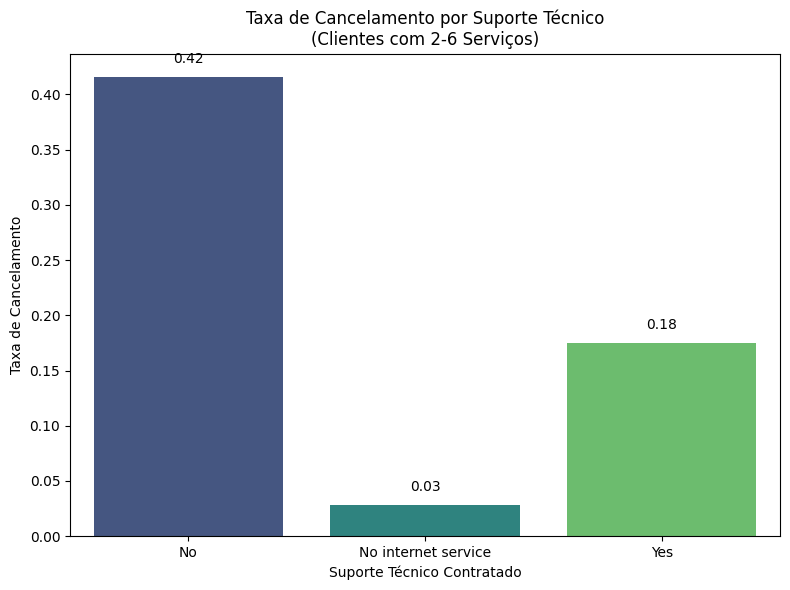

In [34]:
# 1. Definir o intervalo de quantidade de serviços de interesse
min_servicos = 2
max_servicos = 6

# 2. Filtrar o DataFrame para incluir APENAS clientes com quantidade de serviços entre min_servicos e max_servicos
# Certifique-se de que a coluna 'quantidade_servicos' foi criada corretamente antes deste bloco.
clientes_subset = dataframe[
    (dataframe['quantidade_servicos'] >= min_servicos) &
    (dataframe['quantidade_servicos'] <= max_servicos)
].copy() # Usar .copy() para evitar SettingWithCopyWarning

# Verificar o tamanho do subset filtrado
print(f"Número de clientes com entre {min_servicos} e {max_servicos} serviços: {len(clientes_subset)}")
print("\nDistribuição de Suporte Técnico neste subset:")
print(clientes_subset['suporte_tecnico'].value_counts())

# 3. Calcular a taxa de cancelamento por status de suporte técnico NESTE SUBSET
# Agrupa o subset filtrado pelo status de 'suporte_tecnico'
# Calcula a média da coluna 'cancelamento' (Taxa de Cancelamento)
taxa_cancelamento_subset_suporte = clientes_subset.groupby('suporte_tecnico')['cancelamento'].mean().reset_index()
taxa_cancelamento_subset_suporte.columns = ['suporte_tecnico', 'taxa_cancelamento']

print(f"\nTaxa de cancelamento por status de Suporte Técnico para clientes com {min_servicos}-{max_servicos} serviços:")
print(taxa_cancelamento_subset_suporte)

# 4. Visualizar a relação usando um gráfico de barras
plt.figure(figsize=(8, 6))

# Usando seaborn.barplot para mostrar a taxa de cancelamento por status de suporte técnico
ax = sns.barplot(x='suporte_tecnico', y='taxa_cancelamento', data=taxa_cancelamento_subset_suporte, palette='viridis')

plt.title(f'Taxa de Cancelamento por Suporte Técnico\n(Clientes com {min_servicos}-{max_servicos} Serviços)')
plt.xlabel('Suporte Técnico Contratado')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=0)

# Adicionando os rótulos de valor (taxa) nas barras
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(p.get_x() + p.get_width()/2., height + 0.01, # Ajusta a posição vertical
                f'{height:.2f}', # Formata o texto com 2 casas decimais
                ha='center',
                va='bottom')

plt.tight_layout()
plt.show()

In [35]:
# prompt: Chat, pode fazer um arquivo de excel com a tabela tratada da análise e os gráficos?

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Instalar a biblioteca openpyxl para salvar em .xlsx
!pip install openpyxl -q

# Salvar o DataFrame tratado em um arquivo Excel
excel_filename = 'analise_telecom_tratada.xlsx'
dataframe.to_excel(excel_filename, index=False) # index=False para não incluir o índice do DataFrame como uma coluna no Excel

print(f"DataFrame tratado salvo em '{excel_filename}'")

# Salvar os gráficos como arquivos de imagem (ex: PNG)
# Você já gerou os gráficos nos blocos anteriores. Agora vamos salvá-los.

# Gráfico 1: Contagem de Clientes que Cancelaram por Gênero
fig1, ax1 = plt.subplots(figsize=(6, 4))
contagem_genero_cancelamento = dataframe[dataframe['cancelamento'] == True].groupby('genero').size().reset_index(name='Contagem')
sns.barplot(x='genero', y='Contagem', data=contagem_genero_cancelamento, hue='genero', palette='viridis', legend=False, ax=ax1)
ax1.set_title('Contagem de Clientes que Cancelaram por Gênero')
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Contagem de Clientes que Cancelaram')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 5, f'{int(height)}', ha='center', va='bottom')
fig1.tight_layout()
fig1.savefig('grafico_cancelamento_genero.png')
plt.close(fig1) # Fecha a figura para não exibi-la novamente no notebook

# Gráfico 2: Contagem de Clientes que Cancelaram por Status de Suporte Técnico
fig2, ax2 = plt.subplots(figsize=(8, 5))
clientes_cancelaram = dataframe[dataframe['cancelamento'] == True].copy()
contagem_suporte_cancelamento = clientes_cancelaram['suporte_tecnico'].value_counts().reset_index()
contagem_suporte_cancelamento.columns = ['suporte_tecnico', 'Contagem']
sns.barplot(x='suporte_tecnico', y='Contagem', data=contagem_suporte_cancelamento, palette='viridis', hue='suporte_tecnico', legend=False, ax=ax2)
ax2.set_title('Contagem de Clientes que Cancelaram por Status de Suporte Técnico')
ax2.set_xlabel('Suporte Técnico Contratado')
ax2.set_ylabel('Quantidade de Clientes que Cancelaram')
ax2.tick_params(axis='x', rotation=0)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center', va='bottom')
fig2.tight_layout()
fig2.savefig('grafico_cancelamento_suporte.png')
plt.close(fig2)

# Gráfico 3: Contagem de Clientes que Cancelaram por Tempo de Contrato
fig3, ax3 = plt.subplots(figsize=(10, 6))
clientes_cancelaram = dataframe[dataframe['cancelamento'] == True].copy()
bins = [0, 1, 12, 24, clientes_cancelaram['meses_contrato'].max()]
labels = ['Primeiro Mês', 'Primeiro Ano (2-12 meses)', 'Segundo Ano (13-24 meses)', 'Mais de 2 anos']
clientes_cancelaram['tempo_contrato_categoria'] = pd.cut(
    clientes_cancelaram['meses_contrato'], bins=bins, labels=labels, right=True, include_lowest=True)
ordem_categorias = labels
sns.countplot(x='tempo_contrato_categoria', data=clientes_cancelaram, palette='viridis', order=ordem_categorias, hue='tempo_contrato_categoria', legend=False, ax=ax3)
ax3.set_title('Contagem de Clientes que Cancelaram por Tempo de Contrato')
ax3.set_xlabel('Tempo de Contrato')
ax3.set_ylabel('Quantidade de Clientes que Cancelaram')
ax3.tick_params(axis='x', rotation=0)
for p in ax3.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax3.text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center', va='bottom')
fig3.tight_layout()
fig3.savefig('grafico_cancelamento_tempo_contrato.png')
plt.close(fig3)

# Gráfico 4: Clientes que Cancelaram: Distribuição por Tempo de Contrato e Suporte Técnico (Agrupado)
fig4, ax4 = plt.subplots(figsize=(12, 7))
# Recriar clientes_cancelaram e a coluna de categoria caso o kernel tenha sido reiniciado
clientes_cancelaram = dataframe[dataframe['cancelamento'] == True].copy()
bins = [0, 1, 12, 24, clientes_cancelaram['meses_contrato'].max()]
labels = ['Primeiro Mês', 'Primeiro Ano (2-12 meses)', 'Segundo Ano (13-24 meses)', 'Mais de 2 anos']
clientes_cancelaram['tempo_contrato_categoria'] = pd.cut(
    clientes_cancelaram['meses_contrato'], bins=bins, labels=labels, right=True, include_lowest=True)
ordem_categorias = labels
sns.countplot(x='tempo_contrato_categoria', hue='suporte_tecnico', data=clientes_cancelaram,
              palette='viridis', order=ordem_categorias, ax=ax4)
ax4.set_title('Clientes que Cancelaram: Distribuição por Tempo de Contrato e Suporte Técnico')
ax4.set_xlabel('Tempo de Contrato')
ax4.set_ylabel('Quantidade de Clientes que Cancelaram')
ax4.tick_params(axis='x', rotation=0)
ax4.legend(title='Suporte Técnico', loc='upper right')
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', padding=3)
fig4.tight_layout()
fig4.savefig('grafico_cancelamento_tempo_suporte.png')
plt.close(fig4)

# Gráfico 5: Taxa de Cancelamento por Quantidade de Serviços Contratados
fig5, ax5 = plt.subplots(figsize=(10, 6))
# Garanta que 'quantidade_servicos' está criada
colunas_servicos = [
    'servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online',
    'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes'
]
dataframe['quantidade_servicos'] = 0
for coluna in colunas_servicos:
    if coluna == 'servico_telefone':
        dataframe['quantidade_servicos'] += (dataframe[coluna] == 'Yes').astype(int)
    elif coluna == 'multiplas_linhas':
        dataframe['quantidade_servicos'] += (dataframe[coluna] == 'Yes').astype(int)
    elif coluna == 'servico_internet':
        dataframe['quantidade_servicos'] += ((dataframe[coluna] == 'DSL') | (dataframe[coluna] == 'Fiber optic')).astype(int)
    elif coluna in ['seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']:
         dataframe['quantidade_servicos'] += (dataframe[coluna] == 'Yes').astype(int)

taxa_cancelamento_por_servicos = dataframe.groupby('quantidade_servicos')['cancelamento'].mean().reset_index()
taxa_cancelamento_por_servicos.columns = ['quantidade_servicos', 'taxa_cancelamento']

ax5 = sns.barplot(x='quantidade_servicos', y='taxa_cancelamento', data=taxa_cancelamento_por_servicos, palette='viridis', ax=ax5)
ax5.set_title('Taxa de Cancelamento por Quantidade de Serviços Contratados')
ax5.set_xlabel('Quantidade de Serviços Contratados')
ax5.set_ylabel('Taxa de Cancelamento')
ax5.tick_params(axis='x', rotation=0)
for p in ax5.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax5.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')
fig5.tight_layout()
fig5.savefig('grafico_taxa_cancelamento_servicos.png')
plt.close(fig5)

# Gráfico 6: Taxa de Cancelamento por Suporte Técnico (Subset de 2-6 Serviços)
fig6, ax6 = plt.subplots(figsize=(8, 6))
min_servicos = 2
max_servicos = 6
clientes_subset = dataframe[
    (dataframe['quantidade_servicos'] >= min_servicos) &
    (dataframe['quantidade_servicos'] <= max_servicos)
].copy()
taxa_cancelamento_subset_suporte = clientes_subset.groupby('suporte_tecnico')['cancelamento'].mean().reset_index()
taxa_cancelamento_subset_suporte.columns = ['suporte_tecnico', 'taxa_cancelamento']

sns.barplot(x='suporte_tecnico', y='taxa_cancelamento', data=taxa_cancelamento_subset_suporte, palette='viridis', ax=ax6)
ax6.set_title(f'Taxa de Cancelamento por Suporte Técnico\n(Clientes com {min_servicos}-{max_servicos} Serviços)')
ax6.set_xlabel('Suporte Técnico Contratado')
ax6.set_ylabel('Taxa de Cancelamento')
ax6.tick_params(axis='x', rotation=0)
for p in ax6.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax6.text(p.get_x() + p.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')
fig6.tight_layout()
fig6.savefig('grafico_taxa_cancelamento_suporte_subset.png')
plt.close(fig6)


print("\nGráficos salvos como arquivos PNG no diretório atual.")
print("Você precisará inserir as imagens manualmente no arquivo Excel.")

# Opcional: Oferecer para baixar o arquivo Excel e as imagens dos gráficos
from google.colab import files

print(f"\nPronto para baixar o arquivo Excel '{excel_filename}' e os arquivos de imagem dos gráficos.")

# Download do arquivo Excel
# files.download(excel_filename) # Descomente esta linha para baixar o Excel automaticamente
# Download dos arquivos de imagem dos gráficos
# files.download('grafico_cancelamento_genero.png') # Descomente para baixar imagens
# files.download('grafico_cancelamento_suporte.png')
# files.download('grafico_cancelamento_tempo_contrato.png')
# files.download('grafico_cancelamento_tempo_suporte.png')
# files.download('grafico_taxa_cancelamento_servicos.png')
# files.download('grafico_taxa_cancelamento_suporte_subset.png')


DataFrame tratado salvo em 'analise_telecom_tratada.xlsx'


<ipython-input-35-012bab8ce6f6>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(x='quantidade_servicos', y='taxa_cancelamento', data=taxa_cancelamento_por_servicos, palette='viridis', ax=ax5)



Gráficos salvos como arquivos PNG no diretório atual.
Você precisará inserir as imagens manualmente no arquivo Excel.

Pronto para baixar o arquivo Excel 'analise_telecom_tratada.xlsx' e os arquivos de imagem dos gráficos.


<ipython-input-35-012bab8ce6f6>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='suporte_tecnico', y='taxa_cancelamento', data=taxa_cancelamento_subset_suporte, palette='viridis', ax=ax6)


#📄Relatorio Final

Prezado Gestor da TelecomX, Segue conforme solicitado a análise de cancelamentos de sua empresa.
Acesse aqui: https://docs.google.com/spreadsheets/d/15XwyFh8YpFuRKTNrvAK9IyZF8Sosw_ExInPse8CxCsw/edit?usp=sharing

Gostaria de apresentar uma breve análise exploratória que realizei no conjunto de dados de churn da TelecomX, com o objetivo de entender melhor quais fatores podem levar um cliente a cancelar o serviço.

Comecei importando os dados, que vieram em um formato JSON um pouco aninhado. Minha primeira tarefa na etapa de **Transformação** foi "desaninhá-los", ou seja, extrair as informações de colunas como 'customer', 'phone', 'internet' e 'account' e transformá-las em colunas separadas no meu DataFrame. Também renomeei as colunas para português para facilitar a compreensão durante a análise. Um detalhe interessante foi a coluna 'account_charges', que precisou de um passo adicional para desaninhar as informações de faturamento mensal e total. Calculei também uma nova coluna, a `contas_diarias`, para ter uma perspectiva do custo médio por dia para cada cliente, o que pode ser relevante.

Na etapa de **Carga e Análise**, comecei olhando as estatísticas descritivas para ter uma ideia geral dos dados. O `describe()` me mostrou que a média de meses de contrato é de cerca de 32, e que a média de faturamento mensal gira em torno de 64. Arredondei esses valores na visualização do `describe` para ficar mais fácil de ler.

Parti então para a visualização de algumas relações com o cancelamento:

*   Primeiro, olhei a **quantidade de cancelamentos por gênero**. O gráfico de barras mostrou que a distribuição é bem equilibrada entre homens e mulheres que cancelam, sem uma diferença significativa.

*   Em seguida, explorei a relação entre **cancelamento e suporte técnico**. O gráfico de barras me indicou que uma grande parte dos clientes que cancelaram não tinha o serviço de suporte técnico contratado, o que sugere que a falta desse suporte pode ser um fator de risco para o churn.

*   Analisei a **distribuição de cancelamentos pelo tempo de contrato**. Criei categorias como "Primeiro Mês", "Primeiro Ano", "Segundo Ano" e "Mais de 2 anos". O gráfico de barras que fiz para os clientes que cancelaram mostrou que há um pico significativo de cancelamentos logo no primeiro mês e durante o primeiro ano, diminuindo consideravelmente depois de dois anos. Isso reforça a ideia de que a fase inicial do contrato é crítica. Adicionei o total de cancelamentos (que calculamos ser 1859) como uma anotação no gráfico para dar o contexto do volume total.

*   Fui além e investiguei a relação entre a **quantidade de serviços contratados** e a taxa de cancelamento. Criei uma coluna que conta quantos serviços ativos cada cliente possui. O gráfico de barras da taxa de cancelamento por quantidade de serviços revelou uma tendência interessante: a taxa de cancelamento é mais alta para clientes com poucos serviços e tende a diminuir à medida que o cliente contrata mais serviços. Isso pode indicar que clientes com múltiplos serviços são mais "engajados" ou dependem mais da empresa.

*   Por fim, combinei a análise da quantidade de serviços com o suporte técnico. Foquei nos clientes que contrataram entre **2 e 6 serviços** (um grupo com engajamento moderado a alto) e comparei a taxa de cancelamento para aqueles que tinham suporte técnico versus aqueles que não tinham. O gráfico de barras mostrou claramente que, mesmo dentro deste grupo de clientes com mais serviços, a taxa de cancelamento é significativamente mais baixa para quem tem suporte técnico contratado. Isso sugere que o suporte técnico pode ser um serviço importante para retenção, especialmente para clientes que utilizam múltiplos produtos da empresa.

Em resumo, a análise exploratória sugere que o tempo inicial do contrato e a ausência de serviços como o suporte técnico parecem estar associados a uma maior probabilidade de cancelamento. A quantidade de serviços parece ter uma relação inversa com a taxa de churn, e o suporte técnico pode ser um fator protetor contra o cancelamento, mesmo para clientes com mais serviços.

Espero que esta análise traga insights úteis sobre o comportamento de churn nesta base de clientes.

Muito obrigado!

Atenciosamente,

[Ulisses de Pinho Rodrigues Neto]